In [ ]:
# Do one-hot encoding for all features
# 02/17/2022
# Use ctrl + / to comment or uncomment multiple lines ... Good
# 03/21/2022
# Change to survival analysis
# 03/24/2022
# Combined data files. Not possible to use new file for testing
#   becasue the life expectancy of new file is much longer
# 03/25/2022
# Refactor codes for better readability
# Add a piece of code for calculating predictive power
!pip install scikit-survival
import pandas as pd
import numpy as np

from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sksurv.linear_model import CoxPHSurvivalAnalysis


ITERATION = 10 # <----- can change to 100
# here is to convert categorical data to numerical values by using dictionary
#Format label: value
#Can change values to reflext the importance of each attribute

def conv_T(ix):
    T_types = {'0': 0, '1': 1, '1a': 1.25, '1b': 1.5, '1c': 1.75, '2': 2, '2a': 2.3, '2b':2.7, '3':3, '4':4, '4b': 4.5}
    return T_types.get(df.loc[ix,'T'], -1)

def conv_N(ix):
    N_types = {'0': 0, '1': 1, '2': 2, '2c': 2.7, '3': 3}
    return N_types.get(df.loc[ix,'N'], -1)

def conv_M(ix):
    M_types = {'0':0, '1': 1, '1a': 1.3, '1b': 1.5, '1c': 1.8}
    return M_types.get(df.loc[ix,'M'], -1)

def conv_SS(ix):
    SS_types = {'never': 1, 'exsmoker':3,'former smoker' :3,'former' :3, 'current smoker': 4, 'current': 4 }
    return SS_types.get(df.loc[ix,'Smoking status'], 0)

def conv_SA(val):
    if val == '0':
        return (0)
    else:
        return (1)

def conv_BC(ix):
    BC_types = {'never': 0, 'current': 2, 'quit':1}
    return BC_types.get(df.loc[ix,'Belnut chewing'],-1)

def conv_A(ix):
    ALC_types = {'never': 0, 'quit':2, 'social drinking':3, 'habitual drinking':3, 'current':3}
    return ALC_types.get(df.loc[ix,'Alcohol'],-1)

def conv_YN(val):
    if val == 'Y' or val == 'y':
        return (1)
    else:
        return (0)
def conv_dc(val):
        return (val == 'd')

def conv_CEA(val):
    if val < 3:
        return (-1)
    elif val < 5:
        return (0)
    elif val < 20:
        return (1)
    else:
        return (2)

def conv_ALK(ix):
    ALK_types = {'N':0,'positive':2}
    return ALK_types.get(df.loc[ix,'ALK'],1)

def conv_pD(ix):
    pD_types = {'<1%':1,'1% ~50%':2,'>1%':2, '>50%':3}
    return pD_types.get(df.loc[ix,'pD-L1'],-1)

def conv_HT(val):
    if val == 'x':
        val = 160  # filled with mean value
    else:
        val = (int)(val)
    if val < 150:
        return(0)
    elif val < 160:
        return (1)
    elif val < 170:
        return (2)
    else:
        return (3)

def conv_WT(val):
    if val == 'x':
        val = 59  # filled with mean value
    else:
        val = (int)(val)
    if val < 50:
        return(0)
    elif val < 65:
        return (1)
    elif val < 80:
        return (2)
    else:
        return (3)

def conv_Y(val):
     if float(val) < 12:
         return (1)
     else:
         return(2)

def conv_age(val):
    if  val == -1:
        return (2) #impuation
    elif val < 60:
        return (1)
    elif val < 70:
        return(2)
    elif val < 80:
        return(3)
    else:
        return(4)

#def conv_Treat(val):
#    SS_types = {'0':'Treat_NO', 'I' :'Treat_1', 'T': 'Treat_1', 'A':'Treat_2','O':'Treat_3', 'N':'Treat_chemo_O', \
#                'U':'Treat_chemo_O','P':'Treat_chemo_IV', 'G':'Treat_chemo_IV' , 'x': 'Treat_chemo_IV', 'V': 'Treat_chemo_IV', \
#               'B':'Treat_IV'  }
#    return SS_types.get(val,'Treat_NO')

def conv_Treat(val):
    SS_types = {'0':0, 'I' :1, 'T': 1, 'A':2,'O':3, 'N':4, \
                'U':4,'P':5, 'G':5 , 'x': 5, 'V': 6, \
               'B':7, 'Alectinib':7,'altizolizumab':8  }
    return SS_types.get(val,0)


def conv_EG1(ix):
    EG1_types = {'wild':0,'mutation':2}
    return EG1_types.get(df.loc[ix,'EGFR1'],-1)

def conv_EG(ix):
    EG_types = {'-1':0,'Exon 19 del':2, 'L858R':2, 'Exon 19 del,T790M':2,'L858R,T790M':2 }
    return EG_types.get(df.loc[ix,'EGFR'],3)

def comp_ST(new_df,ix):
    if new_df.loc[ix,'M'] == 1:
        return(4)
    elif new_df.loc[ix,'N'] >= 2:
        return(3)
    elif new_df.loc[ix,'T'] <= 2 and new_df.loc[ix,'N'] == 0:
        return(1)
    else:
        return(2)

def convert_freq(tmp): # Frequency of one-hot encoding ...
    leng = len(tmp)
    ser = tmp.value_counts()
    cat = ser.index.values
    cat_no = len(cat)
    #print(cat_no)
    cnt = np.zeros(cat_no)
    #print (ser)
    for ix in range(cat_no):
      cnt[ix] = (ser.iat[ix] / leng) * 3
    #print(cnt)
    for ix, val in enumerate(tmp):
      #print(ix, val, cnt[val == cat])
      tmp[ix] = cnt[val == cat]
    return tmp

def convert_dataframe(df):
    out_df = df[df.loc[:,"Age"] < 100] # <-------- Can choose patients based on Age less than xxx (years)
    df = out_df.fillna(-1) # Handle missing values (filled with -1)
    df.reset_index(inplace=True)

    #new_df holds all numerical values
    new_df = df[['survival (months)','Sex']].copy()

    new_df['Primary_Location']=df['primary_location'].astype('category').cat.codes
    # Numerical encoding here ...
    for ix, val in enumerate(df['Smoking amount']):
        # print (ix, val)
        new_df.loc[ix,'Age']=conv_age(df.loc[ix,'Age'])
        new_df.loc[ix,'T']=conv_T(ix)
        new_df.loc[ix,'N']=conv_N(ix)
        new_df.loc[ix,'M']=conv_M(ix)
        new_df.loc[ix,'Smoke Status'] = conv_SS(ix)
        new_df.loc[ix,'Smoke Amount'] = conv_SA(val)
        new_df.loc[ix,'Treat1'] = conv_Treat(df.loc[ix,'Treat1'])
        new_df.loc[ix,'Treat2'] = conv_Treat(df.loc[ix,'Treat2'])
        new_df.loc[ix,'Treat3'] = conv_Treat(df.loc[ix,'Treat3'])
        new_df.loc[ix,'Belnut chewing'] = conv_BC(ix)
        new_df.loc[ix,'Alcohol status'] = conv_A(ix)
        new_df.loc[ix,'Bone Transfer'] = conv_YN(df.loc[ix,'bone'])
        new_df.loc[ix,'Brain Transfer'] = conv_YN(df.loc[ix,'brain'])
        new_df.loc[ix,'Liver Transfer'] = conv_YN(df.loc[ix,'liver'])
        new_df.loc[ix,'Lung Transfer'] = conv_YN(df.loc[ix,'lung'])
        new_df.loc[ix,'EGFR1'] = conv_EG1(ix)
        new_df.loc[ix,'EGFR'] = conv_EG(ix)
        new_df.loc[ix,'CEA'] = conv_CEA(df.loc[ix,'CEA'])
        new_df.loc[ix,'ALK'] = conv_ALK(ix)
        new_df.loc[ix,'pD-L1'] = conv_pD(ix)
        new_df.loc[ix,'Radio Theorapy'] = conv_YN(df.loc[ix,'(Radio/Therapy)'])
        new_df.loc[ix,'Hight'] = conv_HT(df.loc[ix,'Height'])
        new_df.loc[ix,'Weight'] = conv_WT(df.loc[ix,'Weight'])
        new_df.loc[ix,'Stage'] = comp_ST(new_df,ix)
        new_df.loc[ix,'status'] = conv_dc(df.loc[ix,'comment'])

    #Remove fatures with samll correlation
    if 0: #not too much helpful
      columns = ['PL','Smoke Status','Hight','EGFR1','Liver Transfer','Lung Transfer']
      new_df.drop(columns,axis=1,inplace=True)

    if 0:# Do One-hot encoding if 1 (seems better)
        new_df = pd.get_dummies(new_df,columns=['Treat1','Treat2','Treat3'])
        print(new_df.shape)
        # shape of df_X = 575 x 44

    # Do alternative encoding via frequency (disabled cause NOT useful)
    if 0:
        tmp = new_df['Treat1'].astype('int')
        convert_freq(tmp)
        tmp = new_df['Treat2'].astype('int')
        convert_freq(tmp)
        tmp = new_df['Treat3'].astype('int')
        convert_freq(tmp)

    # check correlation coefficients
    print(new_df.corr()['survival (months)'][:])
    df=pd.DataFrame((new_df.corr()['survival (months)']))
    print(df)
    return new_df




def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

# Main program starts here ..................

df = pd.read_csv('./combine_V1.csv')
new_df = convert_dataframe(df)

# Convert to y matrix for survival problem  ...
new_y = np.zeros(len(new_df),dtype=[('Status', '?'), ('Survival_month', '<f8')])
for ix, val in enumerate(new_df['survival (months)']):
  new_y[ix]=(new_df.loc[ix,'status'],val)

# Remove status & survival info from X matrix (required for survival analysis)
columns = ['status','survival (months)']
new_df.drop(columns,axis=1,inplace=True)

#Pick patients with or without mutation
if 0:
    new_df2 = new_df.loc[new_df['EGFR1'] != 1]
    new_df = new_df2

raw_df = new_df

#print(raw_df.shape)
# shape of df_X = 575 x 42
df_X = raw_df.to_numpy()

# Sample labels are in df_y. Shape of df_y is 507
df_y = new_y
#print(df_y.shape)
X_shape = df_X.shape

# Check which features are more useful

scores = fit_and_score_features(raw_df.values, new_y)
print('\n\nVariable Predictive Power (0.5 means no predictive power):')
print(pd.Series(scores, index=raw_df.columns).sort_values(ascending=False))


base_acc = np.zeros(ITERATION)
cox_acc = np.zeros(ITERATION)
svm_acc = np.zeros(ITERATION)
rsf_acc = np.zeros(ITERATION)
gbt_acc = np.zeros(ITERATION)

for lp in range(ITERATION):
    #Split train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3)
    if 0: # 1 is used only to check the regression performance in predicting training set
        X_test = X_train
        y_test = y_train

    print('----------------------\n')

    if 1: # Baseline approach
        from sksurv.metrics import concordance_index_censored
        max = len(y_test)
        pred = np.zeros(max)
        EG_ix = raw_df.columns.get_loc('EGFR')
        for ix in range(len(y_test)):
            if X_test[ix,EG_ix] == 2:
              pred[ix] = 0.4 # lower risk
            else:
              pred[ix] = 0.6 #　higher risk
        base_acc[lp] = concordance_index_censored(y_test['Status'], y_test['Survival_month'],pred)[0]
        # print('Baseline score =', score[0])
        # print(base_acc[lp])

    if 1: # Cox proportional survival model
        from sksurv.linear_model import CoxnetSurvivalAnalysis
        cox =  CoxnetSurvivalAnalysis()
        #from sksurv.linear_model import CoxPHSurvivalAnalysis
        #clf_k = CoxPHSurvivalAnalysis(tol=1e-06)

        cox.fit(X_train, y_train)
        cox_acc[lp] = cox.score(X_test, y_test)
        #print('Cox score =', acc)

    if 1: #Survival SVM model
        #from sksurv.svm import MinlipSurvivalAnalysis
        #svm= MinlipSurvivalAnalysis(alpha=1, kernel='linear',max_iter=2000)
        from sksurv.svm import FastKernelSurvivalSVM
        svm= FastKernelSurvivalSVM(alpha=1, kernel='linear',max_iter=2000)
        svm.fit(X_train, y_train)
        #predict_s = svm.predict(X_test)
        svm_acc[lp] = svm.score(X_test, y_test)
        #print('SVM score =', acc)

    if 1: #Use 1 to enable random survival forest here
        from sksurv.ensemble import ExtraSurvivalTrees
        rsf = ExtraSurvivalTrees(n_estimators=100)
        rsf.fit(X_train, y_train)
        rsf_acc[lp] = rsf.score(X_test, y_test)
        #print('Random forest score =',score)
        #error_r = np.mean(abs(predict_r - y_test))/error_base
        #print('Random forest avg error (month) =', error_r)

    if 1: #Use 1 to enable Gradient-boosted Cox proportional hazard loss with regression trees as base learner
        from sksurv.ensemble import GradientBoostingSurvivalAnalysis
        regx =GradientBoostingSurvivalAnalysis(n_estimators=100)
        regx.fit(X_train, y_train)
        #predict_g=regx.predict(X_test)
        gbt_acc[lp] = regx.score(X_test, y_test)
        #print('GB tree score =',score)
    print('Loop = ', lp)

print('----------------------\n')
print('Baseline avg score =',base_acc.mean(), 'std = ',base_acc.std())
print('Cox avg score =',cox_acc.mean(), 'std = ',cox_acc.std() )
print('SVM avg score =',svm_acc.mean(), 'std = ',svm_acc.std())
print('Random survival forest avg score =',rsf_acc.mean(), 'std = ',rsf_acc.std())
print('GB tree avg score =',gbt_acc.mean(), 'std = ',gbt_acc.std())




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
survival (months)    1.000000
Sex                  0.030500
Primary_Location     0.008689
Age                 -0.126824
T                   -0.087261
N                    0.084084
M                   -0.382199
Smoke Status         0.008032
Smoke Amount        -0.155450
Treat1               0.087937
Treat2               0.192652
Treat3               0.211651
Belnut chewing       0.181200
Alcohol status       0.038344
Bone Transfer        0.044183
Brain Transfer       0.030812
Liver Transfer      -0.002520
Lung Transfer        0.002431
EGFR1                0.287458
EGFR                -0.261209
CEA                  0.056619
ALK                 -0.086164
pD-L1                0.225221
Radio Theorapy       0.119868
Hight               -0.000986
Weight               0.092301
Stage                0.043035
Name: survival (months), dtype: float64
                   survival (months)
survival (mont

* C-index of RandomSurvivalForest at various time points

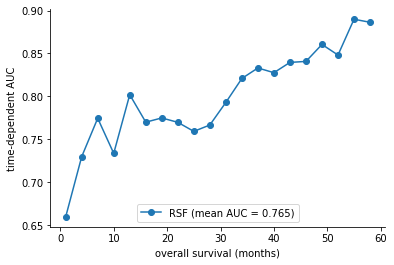

In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import (concordance_index_censored,cumulative_dynamic_auc)
import matplotlib.pyplot as plt

times = np.arange(1.0, 60, 3.0)
rsf_chf_funcs = rsf.predict_cumulative_hazard_function(
    X_test, return_array=False)
rsf_risk_scores = np.row_stack([chf(times) for chf in rsf_chf_funcs])
rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(y_train, y_test, rsf_risk_scores, times)



#Plotting cumulative dynamic auc
fig, ax = plt.subplots()
plt.plot(times, rsf_auc, "o-", label="RSF (mean AUC = {:.3f})".format(rsf_mean_auc))
plt.xlabel("overall survival (months)")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# RSV predict survival function

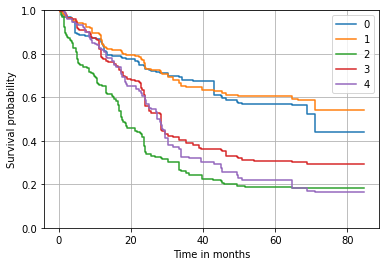

In [ ]:
patient = X_test[0:5,:] # Pick first 5 to plot
surv_funcs = rsf.predict_survival_function(patient)

for i, fn in enumerate(surv_funcs):
   plt.step(fn.x, fn(fn.x), where="post", label=str(i))
plt.ylim(0, 1)
plt.ylabel("Survival probability")
plt.xlabel("Time in months")
plt.legend()
plt.grid(True)
plt.show()

# C-index of GradientBoostingSurvivalAnalysis at various time points

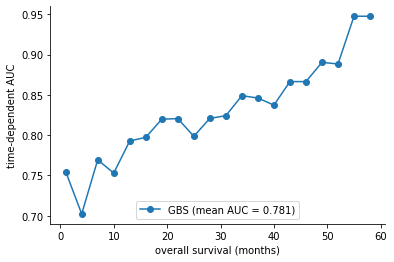

In [ ]:
import matplotlib.pyplot as plt
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

estimator = GradientBoostingSurvivalAnalysis(loss="coxph").fit(X_train, y_train)
gbs_chf_funcs = estimator.predict_cumulative_hazard_function(X_test)

gbs_risk_scores = np.row_stack([chf(times) for chf in gbs_chf_funcs])
gbs_auc, gbs_mean_auc = cumulative_dynamic_auc(y_train, y_test, gbs_risk_scores, times)



#Plotting cumulative dynamic auc
fig, ax = plt.subplots()
plt.plot(times, gbs_auc, "o-", label="GBS (mean AUC = {:.3f})".format(gbs_mean_auc))
plt.xlabel("overall survival (months)")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



# for fn in chf_funcs:
#     plt.step(fn.x, fn(fn.x), where="post")

# plt.ylim(0, 1)
# plt.show()


# C-index of CoxPH survival analysis at various time points

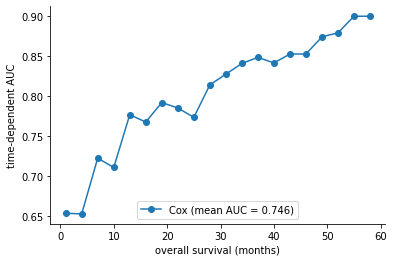

In [ ]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_breast_cancer
from sksurv.preprocessing import OneHotEncoder
from sksurv.linear_model import CoxnetSurvivalAnalysis

estimator = CoxnetSurvivalAnalysis(l1_ratio=0.99, fit_baseline_model=True)
estimator.fit(X_train, y_train)
cox_chf_funcs = estimator.predict_cumulative_hazard_function(X_test)



cox_risk_scores = np.row_stack([chf(times) for chf in cox_chf_funcs])
cox_auc, cox_mean_auc = cumulative_dynamic_auc(y_train, y_test, cox_risk_scores, times)


#Plotting cumulative dynamic auc
fig, ax = plt.subplots()
plt.plot(times, cox_auc, "o-", label="Cox (mean AUC = {:.3f})".format(cox_mean_auc))
plt.xlabel("overall survival (months)")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




# C-index of SVM survival analysis at various time points

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


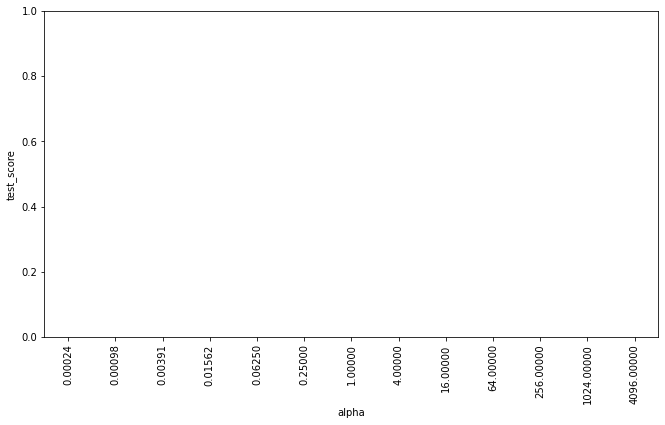

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.svm import NuSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
!pip install scikit-survival
from sksurv.column import encode_categorical
from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM



# # Convert to y matrix for survival problem  ...
# new_y = np.zeros(len(new_df),dtype=[('Status', '?'), ('Survival_month', '<f8')])
# for ix, val in enumerate(new_df['survival (months)']):
#   new_y[ix]=(new_df.loc[ix,'status'],val)

# # Remove status & survival info from X matrix (required for survival analysis)
# columns = ['status','survival (months)']
# new_df.drop(columns,axis=1,inplace=True)



estimator = FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=0)
def score_survival_model(model, X_test, y_test):
    prediction = model.predict(X_test)
    result = concordance_index_censored(y['status'], y['survival (months)'], prediction)
    return result[0]

param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}
cv = ShuffleSplit(n_splits=100, test_size=0.5, random_state=0)
gcv = GridSearchCV(estimator, param_grid, scoring=score_survival_model,
                   n_jobs=4, refit=False,
                   cv=cv)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
gcv = gcv.fit(X_train, y_train)

round(gcv.best_score_, 3), gcv.best_params_

def plot_performance(gcv):
    n_splits = gcv.cv.n_splits
    cv_scores = {"alpha": [], "test_score": [], "split": []}
    order = []
    for i, params in enumerate(gcv.cv_results_["params"]):
        name = "%.5f" % params["alpha"]
        order.append(name)
        for j in range(n_splits):
            vs = gcv.cv_results_["split%d_test_score" % j][i]
            cv_scores["alpha"].append(name)
            cv_scores["test_score"].append(vs)
            cv_scores["split"].append(j)
    df = pandas.DataFrame.from_dict(cv_scores)
    _, ax = plt.subplots(figsize=(11, 6))
    sns.boxplot(x="alpha", y="test_score", data=df, order=order, ax=ax)
    _, xtext = plt.xticks()
    for t in xtext:
        t.set_rotation("vertical")

plot_performance(gcv)











In [ ]:

estimator.set_params(**gcv.best_params_)
estimator.fit(X_train, y_train)

pred = estimator.predict(X_test)
print(np.round(pred, 3))
print(y_test[:2])




ref_estimator = FastSurvivalSVM(rank_ratio=0.0, max_iter=1000, tol=1e-5, random_state=0)
ref_estimator.fit(X_train, y_train)

cindex = concordance_index_censored(
    y_train['status'],
    y_train['survival (months)'],
    -ref_estimator.predict(X_train),  # flip sign to obtain risk scores
)
print(round(cindex[0], 3))


# pred = ref_estimator.predict(x.iloc[:2])
# print(np.round(pred, 3))



[-0.242  0.319  0.292  0.304  0.349  0.189  0.255  0.49   0.437  0.997
  0.927  0.506  0.173  0.055  0.537  0.618  0.567  0.474  0.252  0.627
  0.335 -0.159  0.711  0.743  0.587  0.157  0.799  0.505  0.837 -0.392
  1.077  0.892  0.93   0.711  0.932  0.746  0.823  0.111  0.886  0.343
  0.723  1.222  1.095  0.852 -0.705 -0.268  0.966  0.193 -0.076  0.394
  0.752  0.999  0.088 -0.079  1.014 -0.127  0.595  1.06   0.626  1.379
  0.199  0.644  0.419  0.599  0.862  1.017  0.831  0.554  1.216  0.438
  0.77   0.353  0.455  0.862  0.492  1.015  0.33   0.454  0.269  0.76
  1.059  0.512  0.36   0.547  0.665  0.286  0.973  0.09   0.779  0.21
  1.224  0.589  0.437 -0.101  0.631  0.347  0.955  0.697  0.628  0.613
  0.595  0.531  0.443  0.822 -0.033  0.365  0.391  0.815  0.524  0.581
  0.19   0.231  0.817  0.095  0.62   0.801  1.224  0.079  0.617  0.83
 -0.008  1.055  0.652  0.671  0.18  -0.331 -0.554  0.718  0.873 -0.344
  0.96   0.471  0.342  0.1    0.57   0.547  0.406  0.736  0.388  0.713
  0.733  

ValueError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from pandas import factorize
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.util import Surv
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import set_config

pipe_rsf = make_pipeline(StandardScaler(), rsf)
pipe_rsf.fit(X_train,y_train)
#评价模型
pipe_rsf.score(X_test, y_test)

chf_funcs = pipe_rsf.predict_cumulative_hazard_function(X_test)
#这里的predict是对每一个病例返回一个函数（以时间为参数）


year5_proba=[]
for i,fn in enumerate(chf_funcs):
   proba_5=fn #5年60个月
   year5_proba.append(proba_5)

# print(year5_proba)
result=X_test.copy()
result['5year_proba']=year5_proba
top10_17=result.sort_values(by='5year_proba',ascending=False)[:10]
top10_17['5year_proba']


C-index of SVM at various time points

In [ ]:
!pip sksurv.svm.FastKernelSurvivalSVM
times = np.arange(1.0, 60, 3.0)
svm_chf_funcs = svm.predict_cumulative_hazard_function(
    X_test, return_array=False)
svm_risk_scores = np.row_stack([chf(times) for chf in svm_chf_funcs])
svm_auc, svm_mean_auc = cumulative_dynamic_auc(y_train, y_test, rsf_risk_scores, times)



#Plotting cumulative dynamic auc
fig, ax = plt.subplots()
plt.plot(times, svm_auc, "o-", label="RSF (mean AUC = {:.3f})".format(svm_mean_auc))
plt.xlabel("overall survival (months)")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)








In [ ]:
patient = X_test[0:5,:] # Pick first 5 to plot
surv_funcs = rsf.predict_survival_function(patient)

for i, fn in enumerate(surv_funcs):
   plt.step(fn.x, fn(fn.x), where="post", label=str(i))
plt.ylim(0, 1)
plt.ylabel("Survival probability")
plt.xlabel("Time in months")
plt.legend()
plt.grid(True)
plt.show()

C-index of SVM at various time points

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sksurv.datasets import load_flchain, load_gbsg2
from sksurv.functions import StepFunction
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.preprocessing import OneHotEncoder, encode_categorical
from sksurv.util import Surv

plt.rcParams['figure.figsize'] = [7.2, 4.8]

In [ ]:
import scipy.optimize as opt


def generate_marker(n_samples,
                    hazard_ratio,
                    baseline_hazard,
                    rnd):
    # create synthetic risk score
    X = rnd.randn(n_samples, 1)

    # create linear model
    hazard_ratio = np.array([hazard_ratio])
    logits = np.dot(X, np.log(hazard_ratio))

    # draw actual survival times from exponential distribution,
    # refer to Bender et al. (2005), https://doi.org/10.1002/sim.2059
    u = rnd.uniform(size=n_samples)
    time_event = -np.log(u) / (baseline_hazard * np.exp(logits))

    # compute the actual concordance in the absence of censoring
    X = np.squeeze(X)
    actual = concordance_index_censored(np.ones(n_samples, dtype=bool),  time_event, X)
    return X, time_event, actual[0]
def generate_survival_data(n_samples,hazard_ratio,baseline_hazard,percentage_cens,
                           rnd):
       X, time_event, actual_c = generate_marker(n_samples, hazard_ratio,baseline_hazard, rnd)

def get_observed_time(x):
        rnd_cens = np.random.RandomState(0)
        # draw censoring times
        time_censor = rnd_cens.uniform(high=x, size=n_samples)
        event = time_event < time_censor
        time = np.where(event, time_event, time_censor)
        return event, time

def censoring_amount(x):
        event, _ = get_observed_time(x)
        cens = 1.0 - event.sum() / event.shape[0]
        return (cens - percentage_cens)**2

    # search for upper limit to obtain the desired censoring amount
        res = opt.minimize_scalar(censoring_amount,
                              method="bounded",
                              bounds=(0, time_event.max()))
 # compute observed time
        event, time = get_observed_time(res.x)

    # upper time limit such that the probability
    # of being censored is non-zero for `t > tau`
        tau = time[event].max()
        y = Surv.from_arrays(event=event, time=time)
        mask = time < tau
        X_test = X[mask]
        y_test = y[mask]

        return X_test, y_test, y, actual_c


def simulation(n_samples, hazard_ratio, n_repeats=100):
    measures = ("censoring", "Harrel's C", "Uno's C",)
    data_mean = {}
    data_std = {}
    for measure in measures:
        data_mean[measure] = []
        data_std[measure] = []

    rnd = np.random.RandomState(seed=575)
    # iterate over different amount of censoring
    for cens in (.1, .25, .4, .5, .6, .7):
        data = {"censoring": [], "Harrel's C": [], "Uno's C": [],}

        # repeaditly perform simulation
        for _ in range(n_repeats):
            # generate data
            X_test, y_test, y_train, actual_c = generate_survival_data(n_samples, hazard_ratio,
                baseline_hazard=0.1,
                percentage_cens=cens,
                rnd=rnd)

            # estimate c-index
            c_harrell = concordance_index_censored(y_test["event"], y_test["time"], X_test)
            c_uno = concordance_index_ipcw(y_train, y_test, X_test)

            # save results
            data["censoring"].append(100. - y_test["event"].sum() * 100. / y_test.shape[0])
            data["Harrel's C"].append(actual_c - c_harrell[0])
            data["Uno's C"].append(actual_c - c_uno[0])

        # aggregate results
        for key, values in data.items():
            data_mean[key].append(np.mean(data[key]))
            data_std[key].append(np.std(data[key], ddof=1))

    data_mean = pd.DataFrame.from_dict(data_mean)
    data_std = pd.DataFrame.from_dict(data_std)
    return data_mean, data_std


def plot_results(data_mean, data_std, **kwargs):
    index = pd.Index(data_mean["censoring"].round(3), name="mean percentage censoring")
    for df in (data_mean, data_std):
        df.drop("censoring", axis=1, inplace=True)
        df.index = index

    ax = data_mean.plot.bar(yerr=data_std, **kwargs)
    ax.set_ylabel("Actual C - Estimated C")
    ax.yaxis.grid(True)
    ax.axhline(0.0, color="gray")

In [ ]:
imputer = SimpleImputer().fit(X_train.loc[:, df_X])
X_test_imputed = imputer.transform(X_test.loc[:, df_X])



def plot_cumulative_dynamic_auc(risk_score, label, color=None):
    auc, mean_auc = cumulative_dynamic_auc(y_train, y_test, risk_score, times)

    plt.plot(times, auc, marker="o", color=color, label=label)
    plt.xlabel("days from enrollment")
    plt.ylabel("time-dependent AUC")
    plt.axhline(mean_auc, color=color, linestyle="--")
    plt.legend()


for i, col in enumerate(df_X):
    plot_cumulative_dynamic_auc(X_test_imputed[:, i], col, color="C{}".format(i))
    ret = concordance_index_ipcw(y_train, y_test, X_test_imputed[:, i], tau=times[-1])

In [ ]:
hazard_ratio = 2.0
ylim = [-0.035, 0.035]
mean_1, std_1 = simulation(100, hazard_ratio)
plot_results(mean_1, std_1, ylim=ylim)

In [ ]:
import matplotlib.pyplot as plt
from sksurv.metrics import (concordance_index_censored,cumulative_dynamic_auc)
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis().fit(X_train, y_train)

# chf_funcs = estimator.predict_cumulative_hazard_function

cox =  CoxnetSurvivalAnalysis()
        #from sksurv.linear_model import CoxPHSurvivalAnalysis
        #clf_k = CoxPHSurvivalAnalysis(tol=1e-06)

cox.fit(X_train, y_train)
cox_acc[lp] = cox.score(X_test, y_test)



times = np.arange(1.0, 60, 3.0)
chf_funcs = estimator.predict_cumulative_hazard_function(X_train)
cox_risk_scores = np.row_stack([chf(times) for chf in chf_funcs])
cox_auc, cox_mean_auc = cumulative_dynamic_auc(y_train, y_test, cox_risk_scores, times)



#Plotting cumulative dynamic auc
fig, ax = plt.subplots()
plt.plot(times, rsf_auc, "o-", label="RSF (mean AUC = {:.3f})".format(rsf_mean_auc))
plt.xlabel("overall survival (months)")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)





**Fit logistic regression **

In [ ]:
# df = pd.read_csv('./combine_V1.csv')
# # new_df = convert_dataframe(df)
# print(df)
# #define the predictor variables and the response variable
# X = df[:,:28]
# y = df[:,28]

# #split the dataset into training (70%) and testing (30%) sets
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
new_df["Treat1"]

In [ ]:
pip install scikit-survival


In [ ]:
hist, bin_edges = np.histogram(df['survival (months)'], bins=10)
print(bin_edges, hist)
hist.sum()

In [ ]:
regx.predict(X_test)

In [ ]:
# from google.colab import files
# uploaded = files.upload()



In [ ]:
# raw_df['']


In [ ]:
new_df.shape




In [ ]:
y_test

In [ ]:
categorical_cols = ['Treat1','Treat2']
yy = new_df.astype(int)
yy = yy.astype(str)
yy = pd.get_dummies(yy,columns=None)

print (yy)

In [ ]:
tmp2 = new_df['Treat1'].astype('int')
tmp = tmp2.copy()
print(new_df['Treat1'])

leng = len(tmp)
ser = tmp.value_counts()
ser=ser.sort_index()
cat = ser.index.values
cat_no = len(cat)
print(cat_no)
cnt = np.zeros(cat_no)
print (ser)
for ix in range(cat_no):
  cnt[ix] = (ser.iat[ix] / leng) * 3
print(cnt)
for ix, val in enumerate(tmp):
  #print(ix, val, cnt[val == cat])
  tmp[ix] = cnt[val == cat]
#new_df["Treat1"]

新增加程式


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

Fit the Logistic Regression Model

In [ ]:
#import dataset from CSV file on Github
# url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
# data = pd.read_csv(url)

#define the predictor variables and the response variable
# X = new_df[:,1:26]
# y = new_df[:,0:1]

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

Plot the ROC Curve

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()